In [1]:
from imblearn.over_sampling import SMOTE

In [12]:
import numpy as np
import pandas as pd

In [57]:
data=np.genfromtxt("dataset/cfwd_split_4/chb_03_04_train.csv",delimiter=",")
data.shape

(22079, 69)

In [73]:
x_train=data[:,:-2]
y_train=data[:,-1:].ravel()

In [74]:
print(x_train.shape,y_train.shape)

(22079, 67) (22079,)


In [75]:
np.count_nonzero(y_train==0)

19467

In [76]:
np.count_nonzero(y_train==1)

312

In [77]:
np.count_nonzero(y_train==2)

2300

In [78]:
smt=SMOTE()

In [85]:
x_train,y_train=smt.fit_sample(x_train,y_train)

In [86]:
np.count_nonzero(y_train==0)

19467

In [87]:
np.count_nonzero(y_train==1)

19467

In [88]:
np.count_nonzero(y_train==2)

19467

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
classirier=RandomForestClassifier(n_estimators=1000)

In [91]:
classirier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
test=np.genfromtxt("dataset/cfwd_split_4/chb_03_04_test.csv",delimiter=",")
test.shape

(5521, 69)

In [94]:
x_test=test[:,:-2]
y_test=test[:,-1:]

In [95]:
ans=classirier.predict(x_test)

In [98]:
classirier.feature_importances_

array([0.00696047, 0.01659138, 0.00877393, 0.0250388 , 0.01489313,
       0.00629561, 0.01151343, 0.01302728, 0.01091627, 0.00636536,
       0.00871353, 0.01397144, 0.05313458, 0.07205021, 0.0118719 ,
       0.01140812, 0.01275013, 0.01381191, 0.02217378, 0.03076314,
       0.00575619, 0.01133371, 0.01120198, 0.02564331, 0.0079249 ,
       0.01034507, 0.02618945, 0.01324145, 0.0300926 , 0.00641192,
       0.00885681, 0.02095579, 0.00723777, 0.00761505, 0.00707185,
       0.00527002, 0.0053469 , 0.00653461, 0.00641084, 0.00660975,
       0.00525346, 0.00552989, 0.01778672, 0.05130867, 0.01119743,
       0.01039949, 0.01855673, 0.01000189, 0.00686484, 0.00618068,
       0.00669308, 0.00686646, 0.01935179, 0.01735593, 0.00708618,
       0.01336914, 0.02113262, 0.01866563, 0.04811222, 0.0100126 ,
       0.01003853, 0.0215935 , 0.01055834, 0.01783891, 0.01275787,
       0.00748157, 0.0069315 ])

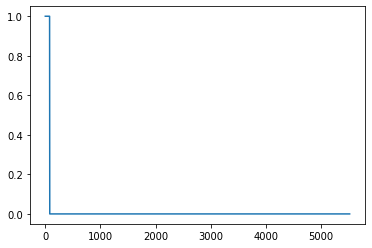

In [100]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.show()

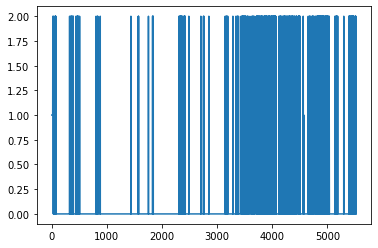

In [101]:
plt.plot(ans)

In [102]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,ans)

In [103]:
conf_mat

array([[5037,   55,  350],
       [   7,   62,   10],
       [   0,    0,    0]])

In [105]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,ans)

/home/b160163ec/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(array([0.99861221, 0.52991453, 0.        ]),
 array([0.92557883, 0.78481013, 0.        ]),
 array([0.96070952, 0.63265306, 0.        ]),
 array([5442,   79,    0]))